# PTIR Data from Harvested Biomass Samples
## Setup
### Library Imports
#### Maths and Plotting

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

#### I/O

In [2]:
import glob

import yaml
import h5py

import pprint

#### PTIR dataset handling

In [3]:
import ptirtools as ptir

### Load Config

In [4]:
CONFIG = None
with open("config.yml", 'r') as handle:
    CONFIG = yaml.safe_load(handle)
assert CONFIG is not None , "Failed to load config file."
pprint.pp(CONFIG)

{'directories': {'ptirfiles': './ptirfiles', 'output': './output'}}


In [5]:
COLORS = None
with open("gruvbox_colors.yml", 'r') as handle:
    COLORS = yaml.safe_load(handle)
assert COLORS is not None , "Failed to load config file."

## Load Data
### Search for Input Files

In [6]:
INPUT_FILE_NAMES = glob.glob(f"{CONFIG['directories']['ptirfiles']}/*.ptir")
INPUT_FILE_NAMES = [ f.split("/")[-1] for f in INPUT_FILE_NAMES ]
INPUT_FILE_NAMES

['[6] 0,19 g.ptir',
 '[1] 0,1476.ptir',
 '[5] 98,6mg.ptir',
 '[2] 0.01.25.ptir',
 '[8] 0,20 g (before crash).ptir',
 '[7] A. platensis.ptir',
 '[4] 0,1653g.ptir',
 '[3] 30.01.25.ptir']

### Load Relevant Data

In [7]:
DATA = {}

for ifn in INPUT_FILE_NAMES:
    h5file = h5py.File(f"{CONFIG['directories']['ptirfiles']}/{ifn}", 'r')
    DATA[ifn] = ptir.h5Group2Dict( h5file, h5file, [] )
    h5file.close()

## Inspection

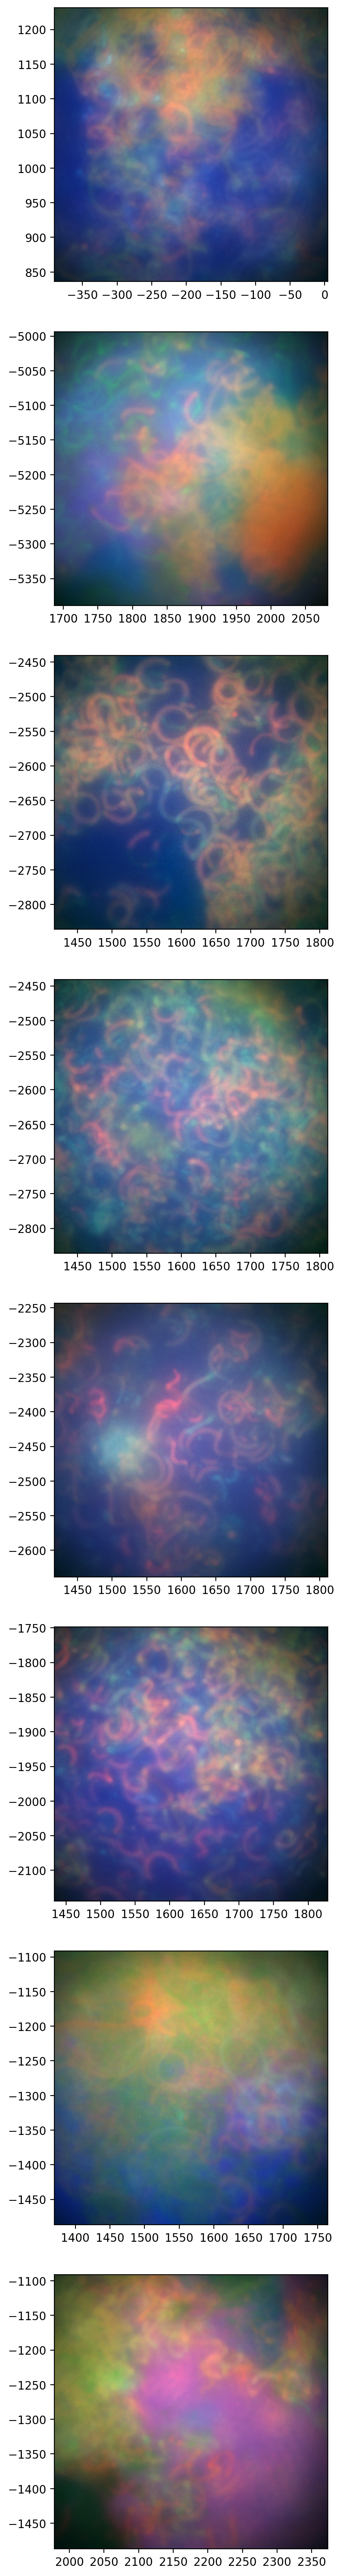

In [14]:
fig = plt.figure( figsize=(4,4*len(INPUT_FILE_NAMES)) , dpi=200 )
gs = fig.add_gridspec( len(INPUT_FILE_NAMES), 1 )
axs = [ fig.add_subplot(gs[i]) for i in range(len(INPUT_FILE_NAMES)) ]

colors = list(COLORS['normal'].values())

for filename,data in DATA.items():
    ax = axs[ int( filename[1] )-1 ]
    for img_key, image in data["Images"].items():
        image_data = image['data']
        metadata = image['meta']

        ax.imshow(
            image_data,
            extent=ptir.image_extent(metadata)
        )

fig.tight_layout()
plt.show()

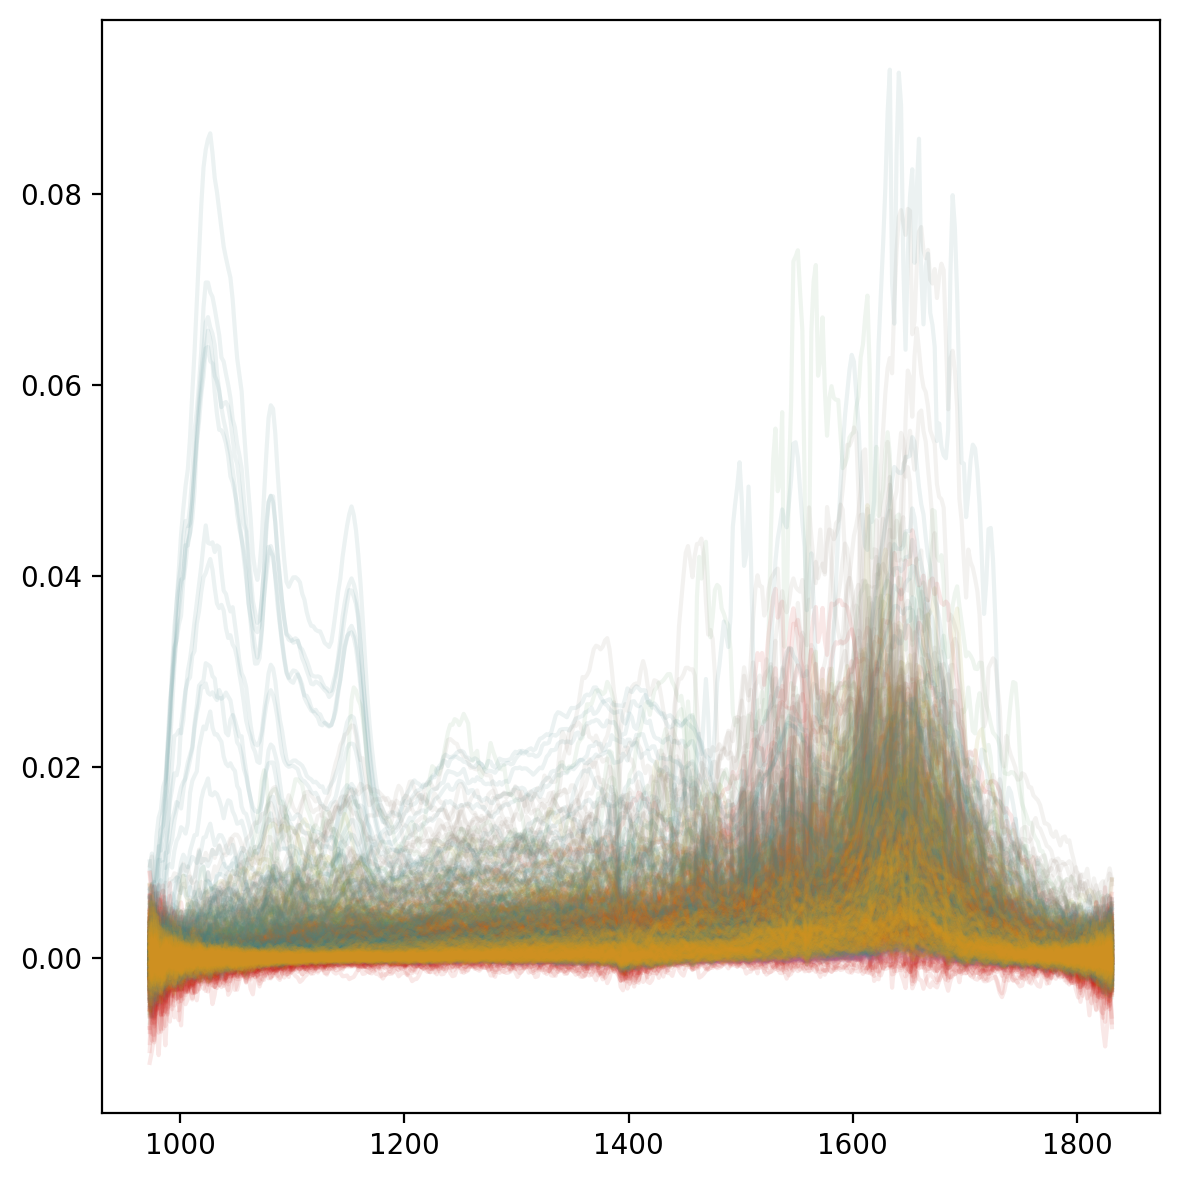

In [9]:
fig = plt.figure( figsize=(6,6) , dpi=200 )
gs = fig.add_gridspec( len(INPUT_FILE_NAMES), 1 )
#axs = [ fig.add_subplot(gs[i]) for i in range(len(INPUT_FILE_NAMES)) ]
ax = fig.add_subplot( gs[:,:] )

colors = list(COLORS['normal'].values())

for filename,data in DATA.items():
    for meas_key, measurement in data.items():
        if meas_key.startswith("Measurement_"):
            if not bool(measurement['attribs']['IsBackground']):
                wavenumbers = measurement['Spectroscopic_Values']['data']
                channels = [ y['Raw_Data']['data'] for ch,y in measurement.items() if ch.startswith("Channel_") ]
                if len(channels) > 0:
                    ax.plot( wavenumbers[0], channels[0][0], color=colors[ int( filename[1] )-1 ], alpha=0.1 )

fig.tight_layout()
plt.show()